In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns
car = pd.read_csv('car data.csv')
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [62]:
car.shape

(301, 9)

In [63]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [64]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [65]:
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [66]:
car.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

car.head()


C:\Users\rakho\AppData\Local\Temp\ipykernel_25416\34220019.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
C:\Users\rakho\AppData\Local\Temp\ipykernel_25416\34220019.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
C:\Users\rakho\AppData\Local\Temp\ipykernel_25416\34220019.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [67]:
x= car.drop(['Car_Name','Selling_Price'],axis=1)
y= car['Selling_Price']

In [68]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

R2 Score (Training): 0.8799451660493716


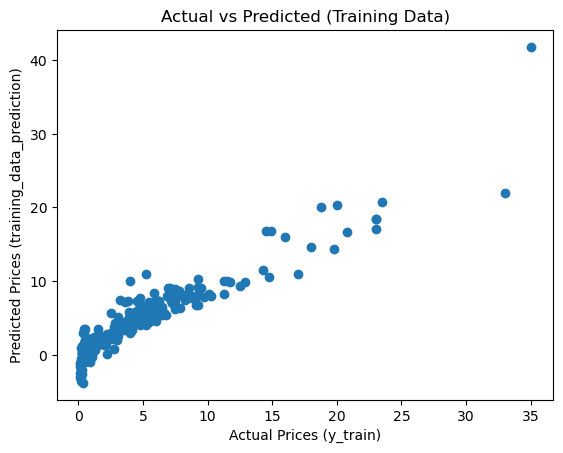

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

# Train model
model = LinearRegression()
model.fit(x_train, y_train)

# ✅ Make predictions on training data
training_data_prediction = model.predict(x_train)

# ✅ R2 score
print("R2 Score (Training):", r2_score(y_train, training_data_prediction))

# ✅ Scatter plot (Actual vs Predicted)
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices (y_train)")
plt.ylabel("Predicted Prices (training_data_prediction)")
plt.title("Actual vs Predicted (Training Data)")
plt.show()

In [71]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


LinearRegression()

In [44]:
t

NameError: name 'training_data_prediction' is not defined

In [57]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (training_data_prediction)")
plt.title("Actual vs Predicted (Training Data)")
plt.show()

NameError: name 'training_data_prediction' is not defined